<h1 align="center">Student Evaluation for Thermonuclear Supernova Classification via their Multi-Wavelength Signatures</h1>

<h3 align="center">By Alexandros P. Pouroullis</h3>

<h2><ins>Step 1</ins></h2>
<font size="3">Identifying relationships between the 3 observable parameters</font>

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

I'll first begin by parsing the contents of the text file. <br>
<p>
    For reference:<br>
    &nbsp; Observable Parameters: <br>
    &emsp;Column 1: $\tau$ (dimensionless) where $\tau$ is the initial optical depth<br>
    &emsp;Column 2: Uncertainty in $\tau$<br>
    &emsp;Column 3: V<sub>max</sub> (s<sup>-1</sup>) where V<sub>max</sub> is the maximum expansion velocity of the ejecta<br>
    &emsp;Column 4: Uncertainty in V<sub>max</sub><br>
    &emsp;Column 5: $\Phi$<sub>300</sub> (photons.cm<sup>-2</sup>.s<sup>-1</sup>) where $\Phi$<sub>300</sub> is the emergent flux of gamma-rays at 300 days post-explosion within the energy band 2 to 4 MeV (10<sup>6</sup><br> &emsp;electronvolts) and at a supernova distance of 20 Mpc (10<sup>6</sup> parsecs).<br>
    &nbsp;Physical Parameters:<br>
    &emsp;Column 6: Total mass ($M_\odot$ – Solar Mass)<br>
    &emsp;Column 7: Mass <sup>56</sup>Ni ($M_\odot$)<br>
    &emsp;Column 8: Explosion energy (10<sup>51</sup> ergs, where 1 erg=10<sup>-7</sup>J)<br>
    &emsp;Column 9: Initial SNela mass distribution flag<br>
    &emsp;Column 10: Initial <sup>56</sup>Ni radial distribution flag<br>
</p>
    

In [88]:
observable_parameters_dict = {"tau":[], "tau_uncertainty":[], "vmax":[], "vmax_uncertainty":[], "emergent_flux":[]}


df = pd.read_csv("datacube.txt", sep=' ', header=None, float_precision=None)

df.columns = ['tau', 'tau_uncertainty', 'vmax', 'vmax_uncertainty', 'emergent_flux', 
                'total_mass', 'mass_nickel56', 'explosion_energy', 'initial_mass_distribution_flag', 'initial_nickel56_distribution_flag']
obs_parameters = df.loc[:, ['tau', 'tau_uncertainty', 'vmax','vmax_uncertainty', 'emergent_flux']]

# with open('datacube.txt', 'r') as f:
#     for line in f:
#         parameters = line.split()
#         observable_parameters_dict["tau"].append(float(parameters[0]))
#         observable_parameters_dict["tau_uncertainty"].append(float(parameters[1]))
#         observable_parameters_dict["vmax"].append(float(parameters[2]))
#         observable_parameters_dict["vmax_uncertainty"].append(float(parameters[3]))
#         observable_parameters_dict["emergent_flux"].append(float(parameters[4]))

obs_parameters.head()


,tau,tau_uncertainty,vmax,vmax_uncertainty,emergent_flux
0,1.940628,0.179354,0.013531,0.000670,0.000003
1,2.071999,0.210287,0.012423,0.000615,0.000003
2,2.007982,0.198804,0.012744,0.000685,0.000003
3,1.661535,0.189436,0.009935,0.000349,0.000003
4,1.907672,0.178607,0.013343,0.000745,0.000003


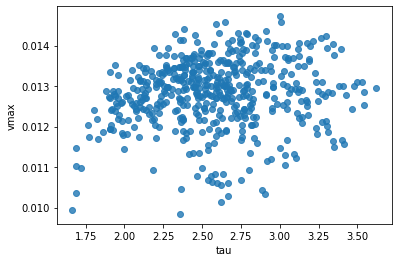

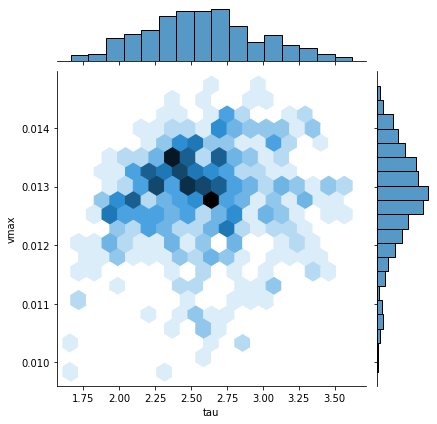

In [117]:
sns.regplot(data = obs_parameters, x = "tau", y = "vmax", fit_reg = False)
sns.jointplot(data = obs_parameters, x = "tau", y = "vmax", kind="hex")

<AxesSubplot:xlabel='tau', ylabel='emergent_flux'>

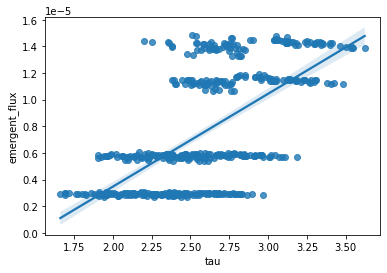

In [106]:
sns.regplot(data = obs_parameters, x = "tau", y = "emergent_flux", fit_reg = True)

In [115]:
obs_parameters.loc[:, ["tau", "emergent_flux"]].corr()

,tau,emergent_flux
tau,1.00000,0.63244
emergent_flux,0.63244,1.00000


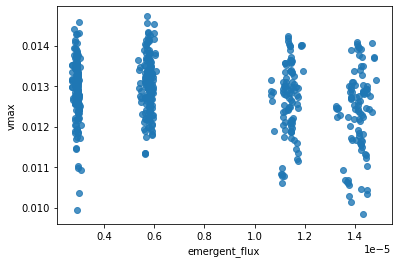

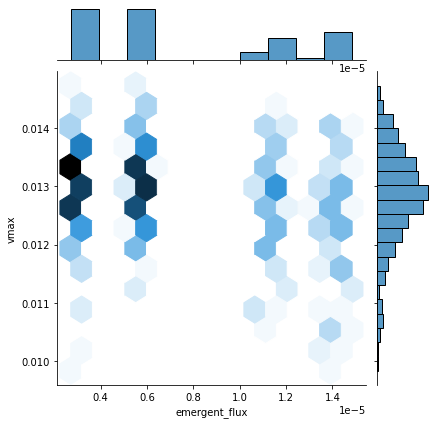

In [119]:
sns.regplot(data = obs_parameters, x = "emergent_flux", y = "vmax", fit_reg = False)
sns.jointplot(data = obs_parameters, x = "emergent_flux", y = "vmax", kind = "hex")